# WEB SCRAPING WITH THE BEAUTIFUL SOUP 4 LIBRARY

With this tutorial we will be looking at this program below. that will find all RTX 3070 graphics cards from memory express 
and desplay their Name, Cost, and availability

In [15]:
from bs4 import BeautifulSoup
import requests
import re

def main():
    print("start..")
    noNewLine = re.compile('\n')
    source = requests.get("https://www.memoryexpress.com/Category/VideoCards?Search=rtx+3070").text
    soup = BeautifulSoup(source, 'lxml')
    products = soup.find_all('div', {"class":"c-shca-icon-item"})
    for product in products: 
        productName = product.find('div', {"class":"c-shca-icon-item__body-details"}).find('a').text
        productName = re.sub('\n+(\s*)', '' , productName)
        productPrice = product.find('div', {'class': 'c-shca-icon-item__summary-list'}).text
        productPrice = re.sub('\n+(\s*)', '' , productPrice)
        productStock = ''
        try:
            productStock = product.find('div', {'class': 'c-shca-icon-item__body-inventory'}).text
            productStock = re.sub('\n+(\s*)', '' , productStock)
        except:
            productStock = "AVAILABLE"
        print(productName)
        print(productPrice)
        print(productStock)

if __name__ == "__main__":
    main()

start..
GeForce RTX 3070 XC3 ULTRA GAMING 8GB PCI-E w/ HDMI, Triple DP 
+829.99
AVAILABLE
DUAL RTX3070 OC GeForce RTX 3070 8GB PCI-E w/ Dual HDMI, Triple DP 
+764.99
Out of Stock
TUF RTX3070 OC GAMING GeForce RTX 3070 8GB PCI-E w/ Dual HDMI, Triple DP 
+809.99
Out of Stock
VENTUS 2X OC GeForce RTX 3070 8GB PCI-E w/ HDMI, Triple DP 
+819.99
Out of Stock
GAMING X TRIO GeForce RTX 3070 8GB PCI-E w/ HDMI, Triple DP 
+899.99
Out of Stock
AORUS GeForce RTX 3070 Master 8GB PCI-E w/ Triple HDMI, Triple DP
+839.99
Out of Stock
GeForce RTX 3070 GAMING OC 8GB PCI-E w/ Dual DP, Dual HDMI
+799.99
Out of Stock
GeForce RTX 3070 FTW3 ULTRA GAMING 8GB PCI-E w/ HDMI, Triple DP 
+899.99
Out of Stock
GeForce RTX 3070 Vision OC 8GB PCI-E w/ Dual HDMI, Dual DP
+799.99
Out of Stock
VENTUS 3X OC GeForce RTX 3070 8GB PCI-E w/ HDMI, Triple DP 
+849.99
Out of Stock
GeForce RTX 3070 EAGLE OC 8GB PCI-E w/ Dual DP, Dual HDMI
+749.99
Out of Stock
KO SERIES RTX 3070 OC GAMING GeForce RTX 3070 8GB PCI-E w/ Dual HDMI, 

# Libraries
What library you needs to install using pip

beautiful soup library: used pull out elements from an html file 

requests: allows you to send HTTP/1.1 requests 

lxml: used to parse html or xml files

In [ ]:
pip install bs4 lxml requests

# Test those imports
to ensure that the libraries we will be used have been installed correctly we need to import them into the python interpreter

In [10]:
from bs4 import BeautifulSoup
import requests

Next lets find ourselves the contents of a site that we want to scrap using the requests library
we will be looking at memory express's page on RTX 3070's

In [11]:
source = requests.get("https://www.memoryexpress.com/Category/VideoCards?Search=rtx+3070").text

if we print the source it'll gives us all the html contents of that webpage
next we need to parse this page with soup using lxml to allow us to use tools to find what we need in the page

In [12]:
soup = BeautifulSoup(source, 'lxml')

# finding what we want to extract
Now that we have set up the page for extracting we need to figure out what we want to extract.
We want to extract all the graphics cards name, cost and availablity
by using the inspect element tool on that page we can see that every product is placed into the same div element class called "c-shca-icon-item".

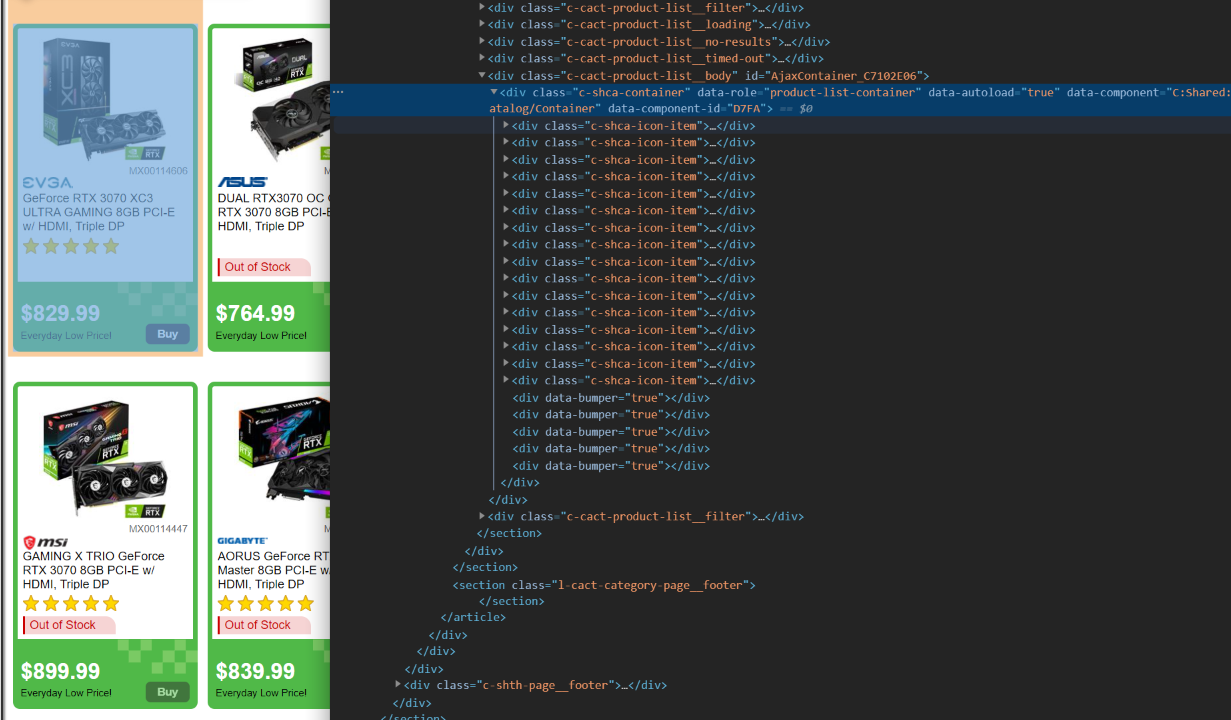

to extract these elements from the page we can use bs4 find_all function
to use this we need to specify what type of element we are looking for and optional attributes about that element
as an object. 

In [ ]:
products = soup.find_all('div', {"class":"c-shca-icon-item"})

Great! now we have all the elements inside a list named products. 
How about we start by trying to extract the title of a single product. 


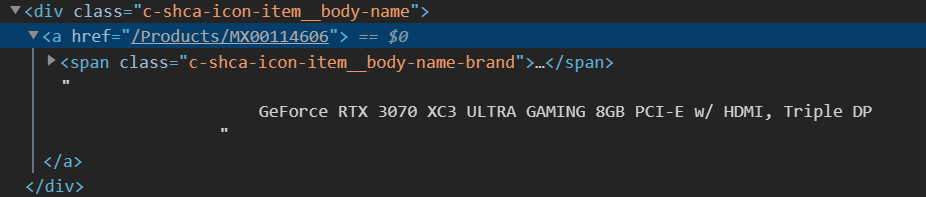

Doing a little digging we can find that the title is stored inside an <a> element. Too bad that there isn't an attribute that we can use to differentiate from all other <a> elements, It does have an href attribute but that won't be useful when we are trying to do it for all products cause the href tag is different for all products. instead of a list of elements, this time we just want a single element so we can just use the find function

Instead lets try and do this in 2 steps. the <a> element is inside a div element class="c-shca-icon-item__body-name". so lets extract that div and then we can extract the <a> element and get the innerhtml from that

In [19]:
nameElement = products[0].find('div', {"class":"c-shca-icon-item__body-details"})
productName = nameElement.find('a').text
print(productName)





                    GeForce RTX 3070 XC3 ULTRA GAMING 8GB PCI-E w/ HDMI, Triple DP 
                


AWESOME! MISSION ACCOMPLISHED. small issue the text is padded with a lot of spaces for some reason
So lets use some regex to fix that
To do that we first must import the regex library

In [ ]:
import re

we will be using the sub function that will take in an regex expression, a substution and your input string
we will use the expression \n+(\s*) that will match with new lines and spaces > 1 
we will replace those matches with an empty string

In [20]:
productName = re.sub('\n+(\s*)', '' , productName)
print(productName)

GeForce RTX 3070 XC3 ULTRA GAMING 8GB PCI-E w/ HDMI, Triple DP 


Now lets format this code so we can generate from the entire list of products

In [21]:
for product in products: 
    productName = product.find('div', {"class":"c-shca-icon-item__body-details"}).find('a').text
    productName = re.sub('\n+(\s*)', '' , productName)
    print(productName)

GeForce RTX 3070 XC3 ULTRA GAMING 8GB PCI-E w/ HDMI, Triple DP 
DUAL RTX3070 OC GeForce RTX 3070 8GB PCI-E w/ Dual HDMI, Triple DP 
TUF RTX3070 OC GAMING GeForce RTX 3070 8GB PCI-E w/ Dual HDMI, Triple DP 
VENTUS 2X OC GeForce RTX 3070 8GB PCI-E w/ HDMI, Triple DP 
GAMING X TRIO GeForce RTX 3070 8GB PCI-E w/ HDMI, Triple DP 
AORUS GeForce RTX 3070 Master 8GB PCI-E w/ Triple HDMI, Triple DP
GeForce RTX 3070 GAMING OC 8GB PCI-E w/ Dual DP, Dual HDMI
GeForce RTX 3070 FTW3 ULTRA GAMING 8GB PCI-E w/ HDMI, Triple DP 
GeForce RTX 3070 Vision OC 8GB PCI-E w/ Dual HDMI, Dual DP
VENTUS 3X OC GeForce RTX 3070 8GB PCI-E w/ HDMI, Triple DP 
GeForce RTX 3070 EAGLE OC 8GB PCI-E w/ Dual DP, Dual HDMI
KO SERIES RTX 3070 OC GAMING GeForce RTX 3070 8GB PCI-E w/ Dual HDMI, Triple DP 
ROG STRIX RTX3070 OC GAMING GeForce RTX 3070 8GB PCI-E w/ Dual HDMI, Triple DP 
ROG STRIX RTX3070 OC WHITE GeForce RTX 3070 8GB PCI-E w/ Dual HDMI, Triple DP 
GeForce RTX 3070 XC3 BLACK GAMING 8GB PCI-E w/ HDMI, Triple DP 
SU

To get the products price and status is pretty much the same thing.

In [23]:
productPrice = products[0].find('div', {'class': 'c-shca-icon-item__summary-list'}).text
productPrice = re.sub('\n+(\s*)', '' , productPrice)
print(productPrice)

+


We start by finding the div containing the value we want to find and then we do some cleaning.
last thing to do is get the availability.
With bs4, in the case that an object was not able to be found an error will return.

In [26]:
productStock = products[0].find('div', {'class': 'c-shca-icon-item__body-inventory'}).text
productStock = re.sub('\n+(\s*)', '' , productStock)
print(productStock)

AttributeError: 'NoneType' object has no attribute 'text'

So what happened here was that on the website they have a specific tag in the case of an out of stock, but in the case of availabilty that element is removed so we will be looking for something that doesn't exist.
To solve this, we will use a try-except block
